In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-tracking-dataset/annotations.xml
/kaggle/input/fish-tracking-dataset/fish.csv
/kaggle/input/fish-tracking-dataset/boxes/94.png
/kaggle/input/fish-tracking-dataset/boxes/48.png
/kaggle/input/fish-tracking-dataset/boxes/61.png
/kaggle/input/fish-tracking-dataset/boxes/37.png
/kaggle/input/fish-tracking-dataset/boxes/35.png
/kaggle/input/fish-tracking-dataset/boxes/70.png
/kaggle/input/fish-tracking-dataset/boxes/73.png
/kaggle/input/fish-tracking-dataset/boxes/92.png
/kaggle/input/fish-tracking-dataset/boxes/75.png
/kaggle/input/fish-tracking-dataset/boxes/89.png
/kaggle/input/fish-tracking-dataset/boxes/11.png
/kaggle/input/fish-tracking-dataset/boxes/95.png
/kaggle/input/fish-tracking-dataset/boxes/97.png
/kaggle/input/fish-tracking-dataset/boxes/76.png
/kaggle/input/fish-tracking-dataset/boxes/31.png
/kaggle/input/fish-tracking-dataset/boxes/03.png
/kaggle/input/fish-tracking-dataset/boxes/43.png
/kaggle/input/fish-tracking-dataset/boxes/40.png
/kaggle/input/fish-tr

## Creating and Copying Directories in Kaggle Environment

This code is designed to manage directories and copy data within the Kaggle environment.

### Libraries Imported:

- **os**: Provides a way of using operating system dependent functionality, such as reading or writing to the file system.
- **shutil**: Offers a higher-level file operation interface which includes functions to copy and remove directories.

### Directory Management:

- The code first checks if the directory `/kaggle/working/fish-tracking-dataset` exists.
- If the directory doesn't exist, it creates the directory using the `os.makedirs()` function. *(Note: This part of the code is commented out.)*

### Data Copying:

- The `shutil.copytree()` function is used to copy the entire directory tree from `/kaggle/input/fish-tracking-dataset` to `/kaggle/working/fish-tracking-dataset`. This means all files and sub-directories within the source directory will be copied to the destination directory.


In [3]:
import os
import shutil
import os
#if not os.path.exists('/kaggle/working/fish-tracking-dataset'):
 #         os.makedirs('/kaggle/working/fish-tracking-dataset')
shutil.copytree('/kaggle/input/fish-tracking-dataset', '/kaggle/working/fish-tracking-dataset')

'/kaggle/working/fish-tracking-dataset'

## Converting XML Annotations to YOLO Format

This code snippet is designed to convert bounding box annotations from XML format (commonly used in datasets like Pascal VOC) to the YOLO (You Only Look Once) format.

### Libraries Imported:

- **os**: Provides functionalities to interact with the operating system, like creating directories.
- **xml.etree.ElementTree**: Used for parsing and creating XML data.

### Function: `xml_to_yolo`

- **Parameters**:
  - `xml_file`: Path to the XML file containing annotations.
  - `class_id`: ID corresponding to the object class (e.g., fish).

- **Functionality**:
  - Parses the XML file to extract image details and bounding box annotations.
  - For each bounding box, it calculates the center coordinates, width, and height normalized with respect to the image dimensions.
  - Constructs a line in the YOLO format for each bounding box and saves these lines to a `.txt` file named after the image.

### Directory Setup:

- Checks if the directory `/kaggle/working/train_txt/labels` exists. If not, it creates the directory.
- The YOLO formatted annotations are saved in this directory with filenames corresponding to the image names.

### Execution:

- The directory containing XML annotations is set to `/kaggle/working/fish-tracking-dataset`.
- The class ID for the "fish" label is defined as 0.
- The code then iterates through each XML file in the directory and converts its annotations to the YOLO format using the `xml_to_yolo` function.



In [4]:
from IPython.lib.display import exists
import os
import xml.etree.ElementTree as ET

def xml_to_yolo(xml_file, class_id):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    for image_elem in root.findall('image'):
        image_id = image_elem.get('id')
        image_name = image_elem.get('name')
        image_name = image_name.split('images/')[1]
        image_name = image_name.split('.')[0]
        print(image_name)
        image_width = int(image_elem.get('width'))
        image_height = int(image_elem.get('height'))

        yolo_lines = []
        for box_elem in image_elem.findall('box'):
            label = box_elem.get('label')
            occluded = int(box_elem.get('occluded'))
            xtl = float(box_elem.get('xtl'))
            ytl = float(box_elem.get('ytl'))
            xbr = float(box_elem.get('xbr'))
            ybr = float(box_elem.get('ybr'))

            # Calculate center coordinates, width, and height
            center_x = (xtl + xbr) / (2 * image_width)
            center_y = (ytl + ybr) / (2 * image_height)
            width = (xbr - xtl) / image_width
            height = (ybr - ytl) / image_height

            # Create a YOLO line
            yolo_line = f"{class_id} {center_x} {center_y} {width} {height}"

            # Append the YOLO line to the list
            yolo_lines.append(yolo_line)

        # Save YOLO annotations to a text file with the same name as the image_id
        if not os.path.exists('/kaggle/working/train_txt/labels'):
          os.makedirs('/kaggle/working/train_txt/labels')
        txt_file_path = os.path.join('/kaggle/working/train_txt/labels', f"{image_name}.txt")
        with open(txt_file_path, 'w') as txt_file:
            txt_file.write('\n'.join(yolo_lines))

# Directory containing XML annotations
xml_dir = '/kaggle/working/fish-tracking-dataset'

# Define the class ID for the "fish" label
class_id = 0

# Iterate through XML files and convert to YOLO format
for xml_filename in os.listdir(xml_dir):
    if xml_filename.endswith('.xml'):
        xml_path = os.path.join(xml_dir, xml_filename)
        xml_to_yolo(xml_path, class_id)


01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Splitting Data into Training and Validation Sets

This code snippet is designed to split the dataset into training and validation sets based on a specified ratio. The data consists of images and their corresponding YOLO annotation files.

### Libraries Imported:

- **os**: Provides functionalities to interact with the operating system, like creating directories.
- **shutil**: Offers a higher-level file operation interface which includes functions to copy and move files.

### Function: `split_train_val_data`

- **Parameters**:
  - `txt_files_dir`: Directory containing YOLO annotation files.
  - `train_dir`: Directory to store training data.
  - `val_dir`: Directory to store validation data.
  - `val_split_ratio`: Fraction of data to be used for validation (default is 0.2 or 20%).

- **Functionality**:
  - Creates directories for storing training and validation images and labels.
  - Shuffles the list of annotation files to ensure randomness.
  - Calculates the number of validation samples based on the `val_split_ratio`.
  - Moves the validation annotation files to the validation directory and copies the corresponding images.
  - Copies the training annotation files to the training directory and moves the corresponding images.

### Execution:

- The directories for YOLO annotation files, training data, and validation data are specified.
- The `split_train_val_data` function is then called to split the data into training and validation sets based on a 20% validation split ratio.



In [5]:
import random


def split_train_val_data(txt_files_dir, train_dir, val_dir, val_split_ratio=0.2):
    # Create train and validation directories if they don't exist
    os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)

    txt_files = os.listdir(txt_files_dir)
    random.shuffle(txt_files)

    num_val_samples = int(val_split_ratio * len(txt_files))
    val_files = txt_files[:num_val_samples]
    train_files = txt_files[num_val_samples:]

    for val_file in val_files:
        src_txt_path = os.path.join(txt_files_dir, val_file)
        dest_txt_path = os.path.join(val_dir, 'labels', val_file)
        shutil.move(src_txt_path, dest_txt_path)

        # Assuming your image filenames match the annotation filenames with the .jpg extension
        image_filename = os.path.splitext(val_file)[0] + '.jpg'
        src_img_path = os.path.join('/kaggle/working/fish-tracking-dataset/images/', image_filename)
        dest_img_path = os.path.join(val_dir, 'images', image_filename)
        shutil.copy(src_img_path, dest_img_path)

    for train_file in train_files:
        src_txt_path = os.path.join(txt_files_dir, train_file)
        dest_txt_path = os.path.join(train_dir, 'labels', train_file)
        shutil.copy(src_txt_path, dest_txt_path)

        # Assuming your image filenames match the annotation filenames with the .jpg extension
        image_filename = os.path.splitext(train_file)[0] + '.jpg'
        src_img_path = os.path.join('/kaggle/working/fish-tracking-dataset/images/', image_filename)
        dest_img_path = os.path.join(train_dir, 'images', image_filename)
        shutil.move(src_img_path, dest_img_path)

# Directory containing YOLO annotation files
txt_files_dir = '/kaggle/working/train_txt/labels'
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'

# Split the data into train and validation sets
split_train_val_data(txt_files_dir, train_dir, val_dir, val_split_ratio=0.2)


In [6]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 9.8 MB/s eta 0:00:00a 0:00:01


In [8]:
!pip install pyyaml


## Loading YOLO Models with Ultralytics

This code snippet demonstrates how to load YOLO (You Only Look Once) models using the Ultralytics library.

### Libraries Imported:

- **ultralytics**: The Ultralytics library provides functionalities for the YOLO object detection framework.

### Loading Models:

There are multiple ways to load a YOLO model using Ultralytics:

1. **Building a New Model from YAML**:
   - `model = YOLO('yolov8n.yaml')`: This line of code builds a new YOLO model based on the architecture specified in the 'yolov8n.yaml' file. *(Note: This line is commented out in the provided code.)*

2. **Loading a Pretrained Model**:
   - `model = YOLO('yolov8s.pt')`: This line loads a pretrained YOLO model from the 'yolov8s.pt' file. Using pretrained models is recommended when training on a new dataset as it can leverage the knowledge from the pretrained weights.

3. **Building from YAML and Transferring Weights**:
   - `model = YOLO('yolov8n.yaml').load('yolov8n.pt')`: This line first builds a YOLO model from the 'yolov8n.yaml' file and then transfers the weights from the 'yolov8n.pt' file. *(Note: This line is commented out in the provided code.)*



In [7]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)
#model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

100%|██████████| 21.5M/21.5M [00:00<00:00, 155MB/s]


## Creating and Saving a YAML Configuration File

This code snippet demonstrates how to define a configuration in Python, and then save it as a YAML (YAML Ain't Markup Language) file using the `yaml` library.

### Libraries Imported:

- **yaml**: The `yaml` library provides functionalities for YAML parsing, which is a human-readable data serialization format.

### Configuration Data:

- A Python dictionary named `config` is defined, which contains various configuration settings:
  - `path`: Working directory path.
  - `train`: Relative path to the training images.
  - `val`: Relative path to the validation images.
  - `nc`: Number of classes.
  - `names`: List of class names.
  - `fl_gamma`: (Commented out) Can be used to specify a focal loss gamma value if needed.

### Saving to YAML File:

- The desired file path for the YAML file is specified as `yaml_file_path`.
- The `with` statement is used to open this file in write mode.
- The `yaml.dump()` function is then used to write the `config` dictionary to the file in YAML format.
- Finally, a confirmation message is printed to indicate the successful saving of the configuration to the YAML file.



In [11]:
import yaml

# Define your configuration data as a Python dictionary
config = {
    'path': '/kaggle/working',
    'train': 'train/images',  # train images (relative to 'path') 4 images
    'val': 'val/images',      # val images (relative to 'path') 4 images
    'nc': 1,                   # Number of classes
    'names': ['Fish'],         # Class names
    # 'fl_gamma': 2.0          # Uncomment this line if needed
}

# Define the file path where you want to save the YAML file
yaml_file_path = '/kaggle/working/config.yaml'  # Update with your desired path and file name

# Write the YAML data to the file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(config, yaml_file)

print(f"YAML configuration file saved at: {yaml_file_path}")


YAML configuration file saved at: /kaggle/working/config.yaml


## Training the YOLO Model with Ultralytics

This code snippet demonstrates how to train a YOLO model using the Ultralytics library based on a specified configuration.

### Model Training:

The `train()` method of the YOLO model is called with the following parameters:

- **data**: Path to the YAML configuration file that contains dataset paths, class names, and other related information.
- **epochs**: Number of training epochs. An epoch is one complete forward and backward pass of all the training examples.
- **imgsz**: Image size for training. All training images will be resized to this size.
- **pretrained**: If set to `True`, the model will use pretrained weights. This can help in achieving better accuracy faster.
- **name**: Name of the training run. Useful for distinguishing between different training sessions.
- **patience**: Number of epochs with no improvement after which training will be stopped. Helps in preventing overfitting.
- **flipud**: Probability of flipping an image vertically during data augmentation.
- **batch**: Batch size for training. Determines the number of samples that will be used in each iteration to update the model's weights.
- **optimizer**: Optimization algorithm to be used. In this case, Stochastic Gradient Descent (SGD) is used.
- **augment**: If set to `True`, data augmentation techniques will be applied to the training images. This can help in improving the model's generalization.

The result of the training process is stored in the `results` variable.



In [12]:
results = model.train(data='/kaggle/working/config.yaml',
                      epochs=220,
                      imgsz=640,
                      pretrained = True ,
                      name= "fish_small",
                      patience = 35,
                      flipud=0.5,
                      batch = 32,
                      optimizer = 'SGD',
                      augment = True
                      )

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/config.yaml, epochs=220, patience=35, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fish_small, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 70.3MB/s]
AMP: checks passed ✅
train: Scanning /kaggle/working/train/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 1013.12it/s]
train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/val/labels... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 934.35it/s]
val: New cache created: /kaggle/working/val/labels.cache
Plotting labels to runs/detect/fish_small2/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs/det

## Validating the YOLO Model with Ultralytics

This code snippet demonstrates how to validate a trained YOLO model using the Ultralytics library.

### Model Loading:

- **model**: The YOLO model is loaded using the `YOLO` class from Ultralytics. The path to the best weights from a previous training run is provided to initialize the model.

### Model Validation:

- **results**: The `val()` method of the YOLO model is called without any parameters to validate the model using the default settings.

### Validation with Different Confidence Thresholds:

The model is further validated using different confidence thresholds to understand its performance at various levels of confidence:

- The `for` loop iterates over a list of confidence thresholds: `0.25`, `0.15`, and `0.05`.
- For each confidence threshold, the `val()` method is called with the following parameters:
  - **name**: A custom name for the validation run, indicating the confidence threshold used.
  - **conf**: The confidence threshold. Only detections with a confidence score above this threshold will be considered.
  - **iou**: Intersection over Union (IoU) threshold set to `0.8`. It determines how much overlap an accurate detection should have with the ground truth for it to be considered correct.

This validation process helps in understanding the model's performance at different confidence levels and can guide decisions on the optimal confidence threshold to use for detections.



In [14]:
model = YOLO('/kaggle/working/runs/detect/fish_small2/weights/best.pt')
results = model.val()
for i in [0.25,0.15,0.05]:
  results = model.val(name= f'cofidence: {i}', conf= i , iou=0.8)

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /kaggle/working/val/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]
                   all         19        185      0.975      0.962      0.979      0.832
Speed: 7.5ms preprocess, 30.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
val: Scanning /kaggle/working/val/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]
                   all         19    

In [16]:
model = YOLO('/kaggle/working/runs/detect/fish_small2/weights/best.pt')

## Importing Essential Libraries for Image Processing and Visualization

This code snippet imports various Python libraries that are commonly used for image processing, data manipulation, and visualization.

### Libraries Imported:

- **pandas**: A powerful library for data manipulation and analysis, particularly with structured data.
- **numpy**: Fundamental package for numerical computations in Python.
- **PIL**: Python Imaging Library (also known as Pillow) is used for opening, manipulating, and saving image files.
- **Image**: A module from PIL to specifically handle image operations.
- **IPython.display**: Provides functionalities to display objects within Jupyter.
- **matplotlib.pyplot**: Provides a MATLAB-like plotting framework in Python.
- **glob**: Useful for retrieving files/pathnames matching a specified pattern.
- **random**: Provides functions to generate random numbers.
- **cv2**: OpenCV library, a powerful tool for computer vision tasks.
- **warnings**: Used to control the behavior of warning messages in Python.

In [17]:
import pandas as pd
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')

## Displaying Random Sample Images from Validation Set

This code snippet is designed to randomly select and display images from the validation set.

### Setting Up Paths and Parameters:

- **root_path**: Specifies the path where validation images are located. The `*` at the end of the path is a wildcard that matches all files in the directory.
- **num_samples**: Number of random sample images to display, set to 4.

### Retrieving and Sampling Images:

- **images_data**: Uses `glob(root_path)` to retrieve all file paths that match the specified pattern, effectively getting paths to all images in the directory.
- **random_image**: Randomly selects `num_samples` image paths from `images_data` using `random.sample()`.

### Displaying Images:

- A matplotlib figure is created with a specified size.
- A `for` loop iterates over the range of `num_samples`:
  - For each iteration, a subplot is created.
  - The image is read using `cv2.imread()` and displayed using `plt.imshow()`.
  - The axis labels are turned off for a cleaner display.

### Visual Output:

- The output will be a 2x2 grid displaying four randomly selected images from the validation set.



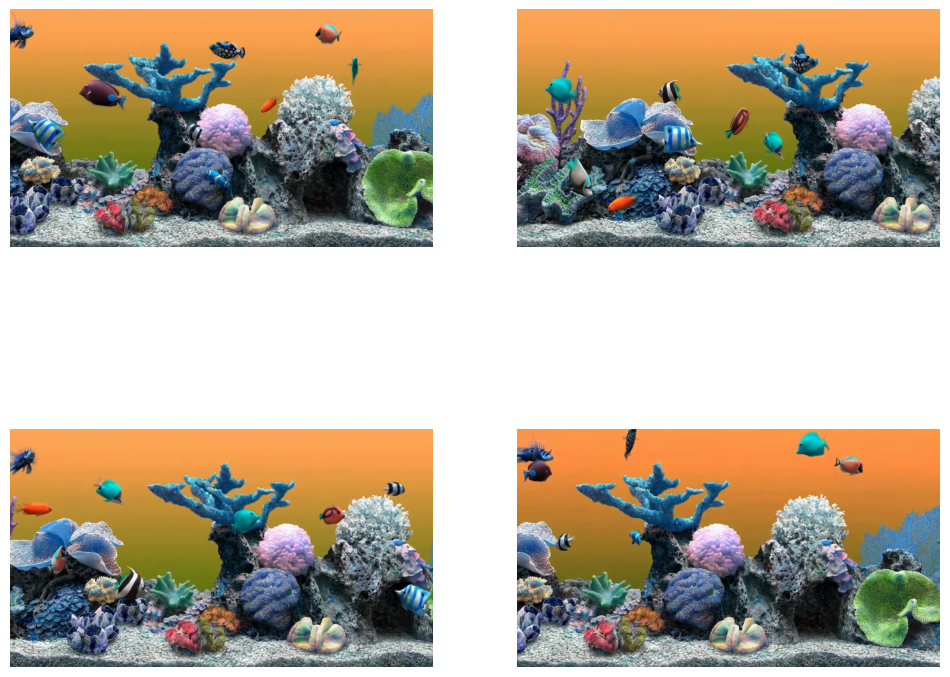

In [18]:
root_path = '/kaggle/working/val/images/*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(12,10))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

## Predicting and Displaying Object Detections on Sample Images

This code snippet is designed to predict object detections on a set of randomly selected images using the trained YOLO model and then display the results.

### Predicting Detections:

- An empty list `images` is initialized to store the processed images with bounding boxes.
- A `for` loop iterates over the range of `num_samples`:
  - For each image, the YOLO model's `predict()` method is called to get the detection results.
  - The results include bounding boxes (`box`), class names (`names`), and other attributes.
  - A series of print statements display information about each detected object:
    - Total number of detected fish in the image.
    - Label of the detected object (e.g., "Fish").
    - Coordinates of the bounding box.
    - Confidence score of the detection.

### Storing Processed Images:

- The `output.plot()` method is used to generate an image with bounding boxes drawn around detected objects.
- The color channels of the image are reversed (`[:, :, ::-1]`) to convert from BGR to RGB format (as OpenCV reads images in BGR format by default).
- The processed image is then appended to the `images` list.

### Visual Output:

- The `images` list will contain the randomly selected sample images with bounding boxes drawn around detected objects, ready for visualization.



In [19]:
images = []
for i in range(num_samples):
    yolo_outputs = model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    print('**********************')
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        print(f'In this image {len(box)} fish has been detected.')
        print(f'Stone {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 /kaggle/working/val/images/82.jpg: 384x640 9 Fishs, 95.2ms
Speed: 3.5ms preprocess, 95.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/val/images/01.jpg: 384x640 8 Fishs, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/val/images/44.jpg: 384x640 9 Fishs, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



**********************
In this image 9 fish has been detected.
Stone 1 is: Fish
Coordinates are: [285.6015930175781, 294.4707336425781, 486.8252868652344, 421.8207702636719]
Confidence is: 0.95
-------
In this image 9 fish has been detected.
Stone 2 is: Fish
Coordinates are: [1264.0433349609375, 63.785804748535156, 1374.7279052734375, 147.3389129638672]
Confidence is: 0.94
-------
In this image 9 fish has been detected.
Stone 3 is: Fish
Coordinates are: [825.6033325195312, 131.70626831054688, 974.5324096679688, 210.22471618652344]
Confidence is: 0.93
-------
In this image 9 fish has been detected.
Stone 4 is: Fish
Coordinates are: [75.4220199584961, 453.93701171875, 225.56961059570312, 597.15576171875]
Confidence is: 0.92
-------
In this image 9 fish has been detected.
Stone 5 is: Fish
Coordinates are: [1039.285400390625, 354.7598876953125, 1117.0732421875, 429.9383544921875]
Confidence is: 0.91
-------
In this image 9 fish has been detected.
Stone 6 is: Fish
Coordinates are: [0.0, 8.8

image 1/1 /kaggle/working/val/images/91.jpg: 384x640 7 Fishs, 11.3ms
Speed: 2.9ms preprocess, 11.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


**********************
In this image 7 fish has been detected.
Stone 1 is: Fish
Coordinates are: [16.887571334838867, 129.40301513671875, 147.6313934326172, 222.2384490966797]
Confidence is: 0.93
-------
In this image 7 fish has been detected.
Stone 2 is: Fish
Coordinates are: [1156.181396484375, 10.933734893798828, 1293.986328125, 115.21495056152344]
Confidence is: 0.93
-------
In this image 7 fish has been detected.
Stone 3 is: Fish
Coordinates are: [1314.125, 112.30644226074219, 1432.7508544921875, 192.95651245117188]
Confidence is: 0.93
-------
In this image 7 fish has been detected.
Stone 4 is: Fish
Coordinates are: [0.2734847366809845, 15.872662544250488, 153.5822296142578, 146.01246643066406]
Confidence is: 0.91
-------
In this image 7 fish has been detected.
Stone 5 is: Fish
Coordinates are: [163.01443481445312, 431.5718994140625, 240.1362762451172, 505.0865783691406]
Confidence is: 0.91
-------
In this image 7 fish has been detected.
Stone 6 is: Fish
Coordinates are: [434.7406

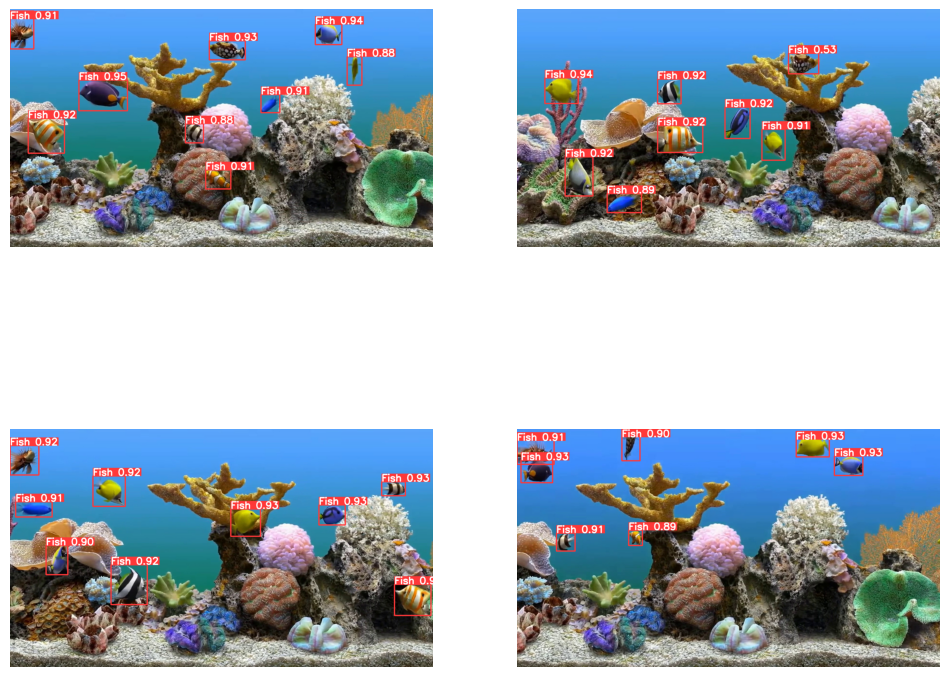

In [20]:
plt.figure(figsize=(12,10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off') 

## Visualizing Training and Validation Losses

This code snippet is designed to visualize the training and validation losses over epochs for both box and class losses.

### Data Preprocessing:

- **Removing Spaces**: The leading and trailing spaces from the column names of the `result` dataframe are removed using the `str.strip()` method.

### Extracting Relevant Data:

- **epoch_column**: Extracts the epoch numbers.
- **box_train_losses** and **box_val_losses**: Extracts the training and validation box losses, respectively.
- **cls_train_losses** and **cls_val_losses**: Extracts the training and validation class losses, respectively.

### Plotting Losses:

- A figure with two subplots is created using `plt.figure()` and `plt.subplot()`.
- The `ggplot` style is applied to the plots for better visualization.
  
1. **Box Losses**:
   - The first subplot displays the training and validation box losses over epochs.
   - The `plt.plot()` function is used to plot the box losses against the epochs.
   - A grid is added for better readability.
   - Labels, title, and legend are added for clarity.

2. **Class Losses**:
   - The second subplot displays the training and validation class losses over epochs.
   - The `plt.plot()` function is used to plot the class losses against the epochs.
   - A grid is added for better readability.
   - Labels, title, and legend are added for clarity.

Finally, `plt.show()` is called to display the plots.

### Visual Output:

- The output will be two line plots side by side:
  - The left plot shows the training and validation box losses over epochs.
  - The right plot shows the training and validation class losses over epochs.



In [23]:
result = pd.read_csv('/kaggle/working/runs/detect/fish_small2/results.csv')
result.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.5832,3.2657,1.2613,0.42559,0.28108,0.25668,0.15562,1.2227,2.3094,1.1686,0.098200,0.000200,0.000200
1,2,1.6403,3.2833,1.2465,0.48850,0.34595,0.31395,0.19502,1.2229,2.1681,1.1705,0.095498,0.000498,0.000498
2,3,1.5725,3.0169,1.2040,0.65056,0.49730,0.52829,0.33807,1.1993,1.5909,1.1866,0.092793,0.000793,0.000793
3,4,1.3854,1.9743,1.2295,0.85601,0.69189,0.77359,0.51048,1.1596,1.2568,1.1837,0.090085,0.001085,0.001085
4,5,1.2620,1.3021,1.1170,0.91668,0.77311,0.84726,0.57330,1.0980,1.1362,1.1058,0.087375,0.001375,0.001375


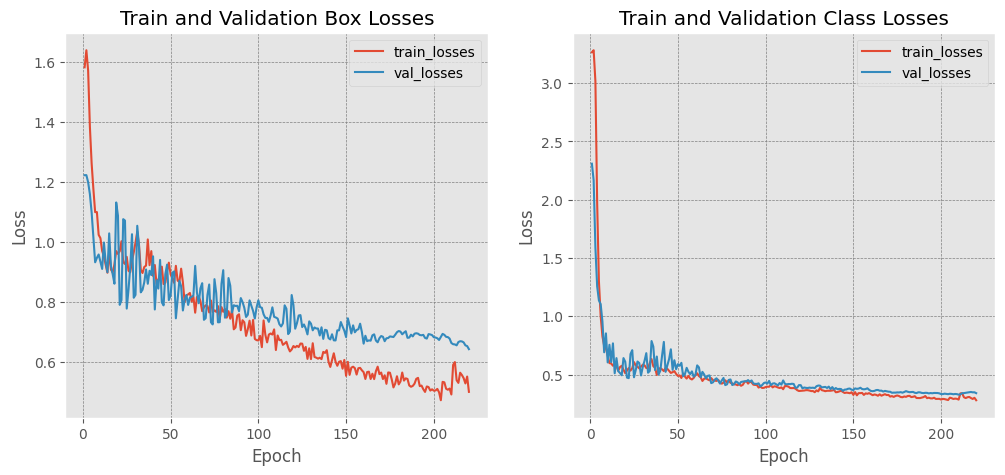

In [24]:
# Remove leading and trailing spaces from column names
result.columns = result.columns.str.strip()

epoch_column = result['epoch']
box_train_losses = result['train/box_loss']
box_val_losses = result['val/box_loss']
cls_train_losses = result['train/cls_loss']
cls_val_losses = result['val/cls_loss']

plt.figure(figsize=(12,5))
plt.style.use('ggplot')  # You can choose a style you prefer
plt.subplot(1,2,1)
plt.plot(epoch_column, box_train_losses, label='train_losses')
plt.plot(epoch_column, box_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_column, cls_train_losses, label='train_losses')
plt.plot(epoch_column, cls_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Class Losses')
plt.legend()
plt.show()

(-0.5, 2399.5, 1199.5, -0.5)

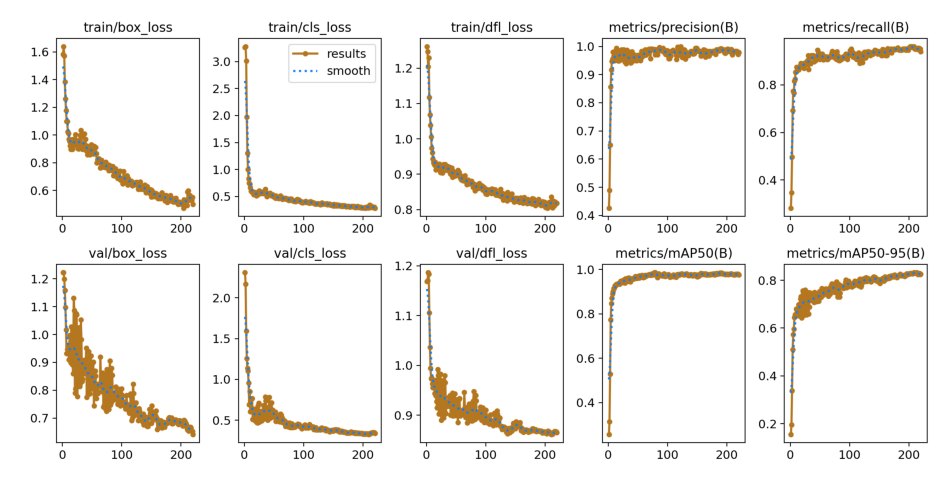

In [25]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/kaggle/working/runs/detect/fish_small2/results.png'))
plt.axis('off')